In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def read_file(filename):
    img=cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    plt.show()
    return img

    

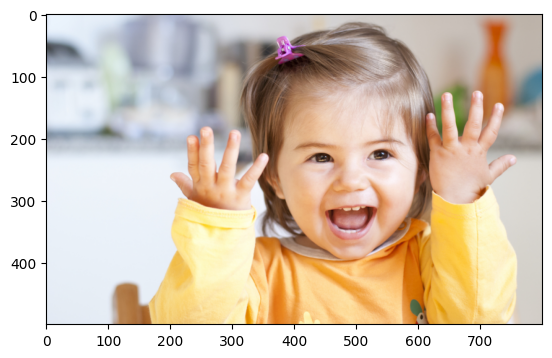

In [71]:
filename ="imge.png"
img = read_file(filename)

org_img = np.copy(img)

In [72]:
#create Edge mask
def edge_mask(img, line_size,blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, line_size, blur_value)
    return edges

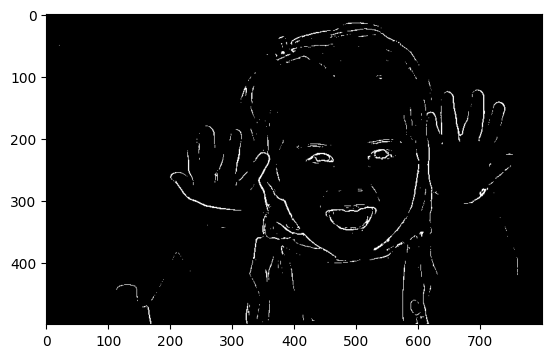

In [73]:
line_size, blur_value = 5,7
edges = edge_mask(img , line_size,blur_value)
plt.imshow(edges, cmap ="binary")
plt.show()

In [74]:
def color_quantization(img , k):
    
    #Transform the image
    data = np.float32(img).reshape((-1,3))

    #determine the criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20,0.001)

    ##implemnting k_means

    ret, label , center = cv2.kmeans(data,k, None, criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

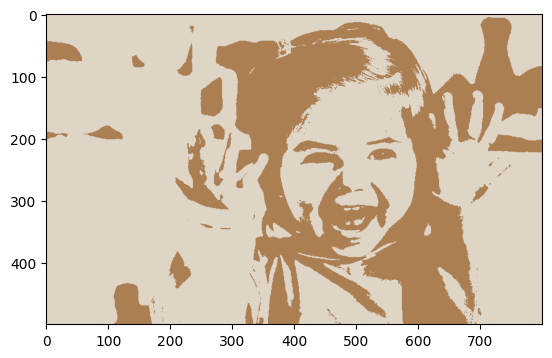

In [75]:
img = color_quantization(img, k=2)
plt.imshow(img)
plt.show()

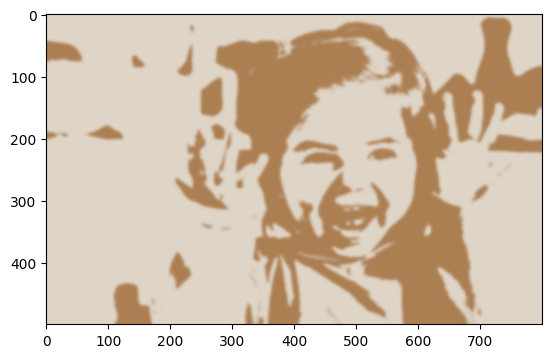

In [76]:
blurred = cv2.bilateralFilter(img , d=10, sigmaColor=300, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [77]:
#combine edge mask with the quantiz img
def cartoon():
    c= cv2.bitwise_and(blurred , blurred, mask=edges)
   

    plt.imshow(org_img)
    plt.title("orgiginal Image")
    plt.show()

    plt.imshow(c)
    plt.title("Cartonify Image")
    plt.show()
    

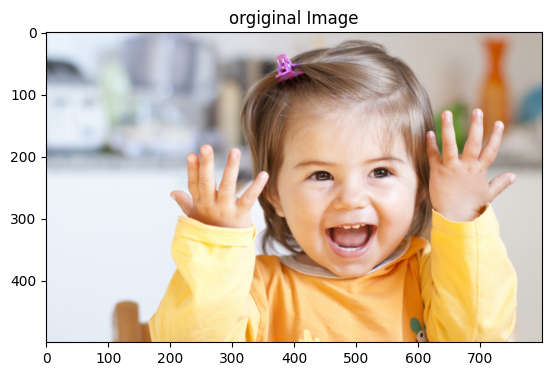

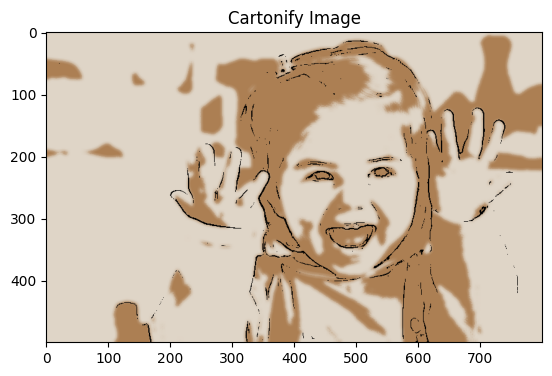

In [78]:
cartoon()